<a href="https://colab.research.google.com/github/Abbhiraami/algorithm_scratch/blob/main/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import io
import random
from google.colab import files
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import gammaln, psi
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.model_selection import train_test_split



In [ ]:
#### Upload files in google collab #####
train_file=files.upload()
test_file=files.upload()


In [ ]:
train_df = pd.read_csv(io.BytesIO(train_file['data_train.csv']))
test_df=pd.read_csv(io.BytesIO(test_file['data_test (2).csv']))

In [ ]:
#### Handling missing values with zeros
train_df=train_df.fillna(0)
test_df=test_df.fillna(0)

### Building a linear regression based on gradient descent

In [ ]:
class LinearRegressionGD:
    """
    Multiple Linear Regression using Gradient Descent Optimization.

    Attributes:
        learning_rate (float): The step size for each iteration of Gradient Descent.
        num_iterations (int): The number of iterations to run Gradient Descent.
        theta (numpy.ndarray): The learned coefficients, including the intercept.
        X_mean (numpy.ndarray): Mean of the features from the training data.
        X_std (numpy.ndarray): Standard deviation of the features from the training data.
    """

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Initializes the LinearRegressionGD model with hyperparameters.

        Parameters:
            learning_rate (float, optional): Learning rate for Gradient Descent. Default is 0.01.
            num_iterations (int, optional): Number of iterations for Gradient Descent. Default is 1000.
            regularization (str or None, optional): Type of regularization ('ridge', 'lasso', or None). Default is None.
            lambda_ (float, optional): Regularization strength. Default is 0.0 (no regularization).
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        # self.regularization = regularization
        # self.lambda_ = lambda_
        self.theta = None
        self.X_mean = None
        self.X_std = None

    def train(self, X, y):
        """
        Trains the Linear Regression model using Gradient Descent.

        Parameters:
            X (numpy.ndarray): Feature matrix of shape (m, n).
            y (numpy.ndarray): Target vector of shape (m,).

        Returns:
            None
        """
        # Convert y to a column vector
        y = y.reshape(-1, 1)  # Shape: (m, 1)

        # Number of training examples and features
        m, n = X.shape

        # # Feature Scaling (Standardization)
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        # # To avoid division by zero
        self.X_std[self.X_std == 0] = 1
        X_scaled = (X - self.X_mean) / self.X_std
        # X_scaled=X

        # Add intercept term (column of ones)
        X_scaled = np.hstack((np.ones((m, 1)), X_scaled))  # Shape: (m, n+1)

        # Initialize theta (n+1, 1) with zeros
        self.theta = np.zeros((n + 1, 1))

        # Gradient Descent Iterations
        for i in range(self.num_iterations):
            # Compute predictions
            y_pred = np.dot(X_scaled, self.theta)  # Shape: (m, 1)

            # Compute error
            error = y_pred - y  # Shape: (m, 1)

            # Compute Gradient
            gradient = (2 / m) * np.dot(X_scaled.T, error)  # Shape: (n+1, 1)


            # Update theta
            self.theta -= self.learning_rate * gradient


    def predict(self, X):
        """
        Generates predictions for new data using the trained Linear Regression model.

        Parameters:
            X (numpy.ndarray): New feature matrix of shape (m_new, n).

        Returns:
            numpy.ndarray: Predicted target vector of shape (m_new,).
        """
        # Number of new examples
        m_new = X.shape[0]

        # Feature Scaling using training data parameters
        X_scaled = (X - self.X_mean) / self.X_std
        # X_scaled=X

        # Add intercept term
        X_scaled = np.hstack((np.ones((m_new, 1)), X_scaled))  # Shape: (m_new, n+1)

        # Compute predictions
        y_pred = np.dot(X_scaled, self.theta)  # Shape: (m_new, 1)

        # Return as a 1-D array
        return y_pred.flatten()


In [ ]:
#### Intializing the model ####
model = LinearRegressionGD(
    learning_rate=0.01,
    num_iterations=1000
    )

#### Fitting a linear regression model and evaluating it to do further prediction on the test_df

1. As part of feature contributions, we are going to include features incrementally to fit and infer the model
2. Split the train set into train and eval or even in the name of test
3. Calculate RMSE and $R^2$ to determine the fit and ability of the model

Mean squared error

$
MSE = \frac{1}{n} \Sigma (y_i - \hat{y})^2
$

$
R^2 = 1- [\frac{\Sigma (y_i-\hat{y})^2}{\Sigma (y_i-\bar{y})^2}]
$

In [ ]:
### List of features
list_fts=train_df[test_df.columns.to_list()].columns.to_list()[1:]

### Shuffling to understand the featur contribution on an incremental basis (Optional: You can switch this off to have a static list)
random.shuffle(list_fts)
features_columns=list_fts.copy()

### Creating the empty list for feature selection
list_feats=[]

### Dataframe to forward feature selection evaluation
data=pd.DataFrame()

for i in features_columns:
  list_feats.append(i)

  Y=train_df['PT08.S1(CO)']
  X=train_df[list_feats]

### This splitting is neccessary as test data given for the assignment does not have true y's - Hence for evaluation sake, I'm splitting the train set further into train and test
  X_train,X_test,Y_train,Y_test=train_test_split(X.to_numpy(),Y.to_numpy(),test_size=0.2,random_state=42)
#### Train the model
  model.train(X_train, Y_train)
#### Evaluate the model
  y_pred = model.predict(X_test)

#### RMSE & R-squared values to determine the feature selection
  rmse= np.sqrt(np.mean((Y_test-y_pred)**2))
  # print(f"The roort mean squared error:{rmse:.2f}")
  r_squared=1-(np.sum((Y_test-y_pred)**2)/np.sum((Y_test-np.mean(Y_test))**2))

  data_set={'Feature':[X.columns.to_list()],'RMSE':rmse,'R-squared':r_squared}
  data=pd.concat([data,pd.DataFrame(data_set,index=[0])],ignore_index=True)
data

,Feature,RMSE,R-squared
0,[PT08.S4(NO2)],179.187750,0.763757
1,"[PT08.S4(NO2), NO2(GT)]",171.543971,0.783482
2,"[PT08.S4(NO2), NO2(GT), NOx(GT)]",158.212875,0.815827
3,"[PT08.S4(NO2), NO2(GT), NOx(GT), PT08.S2(NMHC)]",122.845701,0.888964
4,"[PT08.S4(NO2), NO2(GT), NOx(GT), PT08.S2(NMHC)...",92.141729,0.937532
5,"[PT08.S4(NO2), NO2(GT), NOx(GT), PT08.S2(NMHC)...",84.266479,0.947754
6,"[PT08.S4(NO2), NO2(GT), NOx(GT), PT08.S2(NMHC)...",82.981701,0.949335
7,"[PT08.S4(NO2), NO2(GT), NOx(GT), PT08.S2(NMHC)...",82.669353,0.949716
8,"[PT08.S4(NO2), NO2(GT), NOx(GT), PT08.S2(NMHC)...",82.723601,0.949650
9,"[PT08.S4(NO2), NO2(GT), NOx(GT), PT08.S2(NMHC)...",80.178882,0.952700


,Feature,RMSE,R-squared
0,[T],236.168402,0.589620
1,"[T, NOx(GT)]",194.370108,0.722028
2,"[T, NOx(GT), PT08.S4(NO2)]",138.355341,0.859157
3,"[T, NOx(GT), PT08.S4(NO2), C6H6(GT)]",118.756377,0.896234
4,"[T, NOx(GT), PT08.S4(NO2), C6H6(GT), PT08.S2(N...",102.494884,0.922706
5,"[T, NOx(GT), PT08.S4(NO2), C6H6(GT), PT08.S2(N...",90.848804,0.939273
6,"[T, NOx(GT), PT08.S4(NO2), C6H6(GT), PT08.S2(N...",90.837805,0.939288
7,"[T, NOx(GT), PT08.S4(NO2), C6H6(GT), PT08.S2(N...",90.641694,0.939550
8,"[T, NOx(GT), PT08.S4(NO2), C6H6(GT), PT08.S2(N...",87.619693,0.943513
9,"[T, NOx(GT), PT08.S4(NO2), C6H6(GT), PT08.S2(N...",87.706747,0.943401


#### Features with scaling


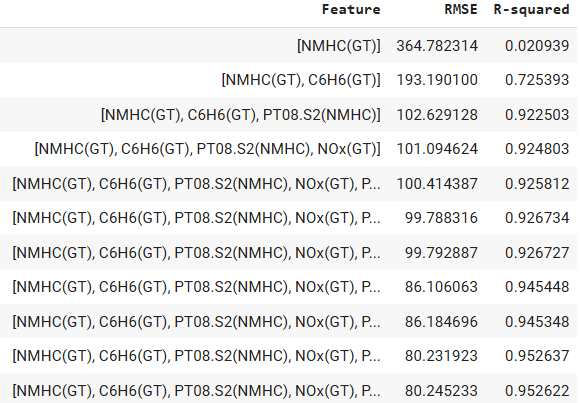